## 아파트 관리비 예측 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# 한글 깨짐 방지(나눔고딕)
plt.rcParams['font.family'] = 'MalgunGothic'

In [ ]:
# # train/test split
# train_size = int(len(xy) * 0.7)
# train_set = xy[0:train_size]
# test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# # Scale each
# train_set = MinMaxScaler(train_set)
# test_set = MinMaxScaler(test_set)

# seq_length=7

# # build datasets
# def build_dataset(time_series, seq_length):
#     dataX = []
#     dataY = []
#     for i in range(0, len(time_series) - seq_length): #0~52
#         _x = time_series[i:i + seq_length, :]
#         _y = time_series[i + seq_length, [-1]]  
#         print(_x, "->", _y)
#         dataX.append(_x)
#         dataY.append(_y)
#     return np.array(dataX), np.array(dataY)

# trainX, trainY =build_dataset(train_set, seq_length)


In [10]:
df = pd.read_csv("maintenanceCost_stacked.csv")

In [11]:
df.head()

,Date,난방 공용,수도 공용,인건비,전기 공용,제사무비,제세공과금,경비비,수선유지비,일반관리비,청소비,공용관리비
0,2015-01-01,10479922,1519455,18667600,4340357,846450,286710,23870820,2911080,20075760,7528740,56133060
1,2015-02-01,7989222,557425,18658930,4157157,658700,146120,23870820,2658180,19738750,7528740,55543150
2,2015-03-01,6851372,4693430,18594380,4002670,731260,146030,23870820,3800710,19796670,7528740,56743600
3,2015-04-01,2409442,4304100,18964120,3245115,485220,148980,23696300,2902730,19911320,7425080,55682090
4,2015-05-01,998032,1245270,18995190,1612106,472500,122840,23870820,3027500,19865530,7571550,56082060


In [12]:
import seaborn as sns

findfont: Font family ['MalgunGothic'] not found. Falling back to DejaVu Sans.


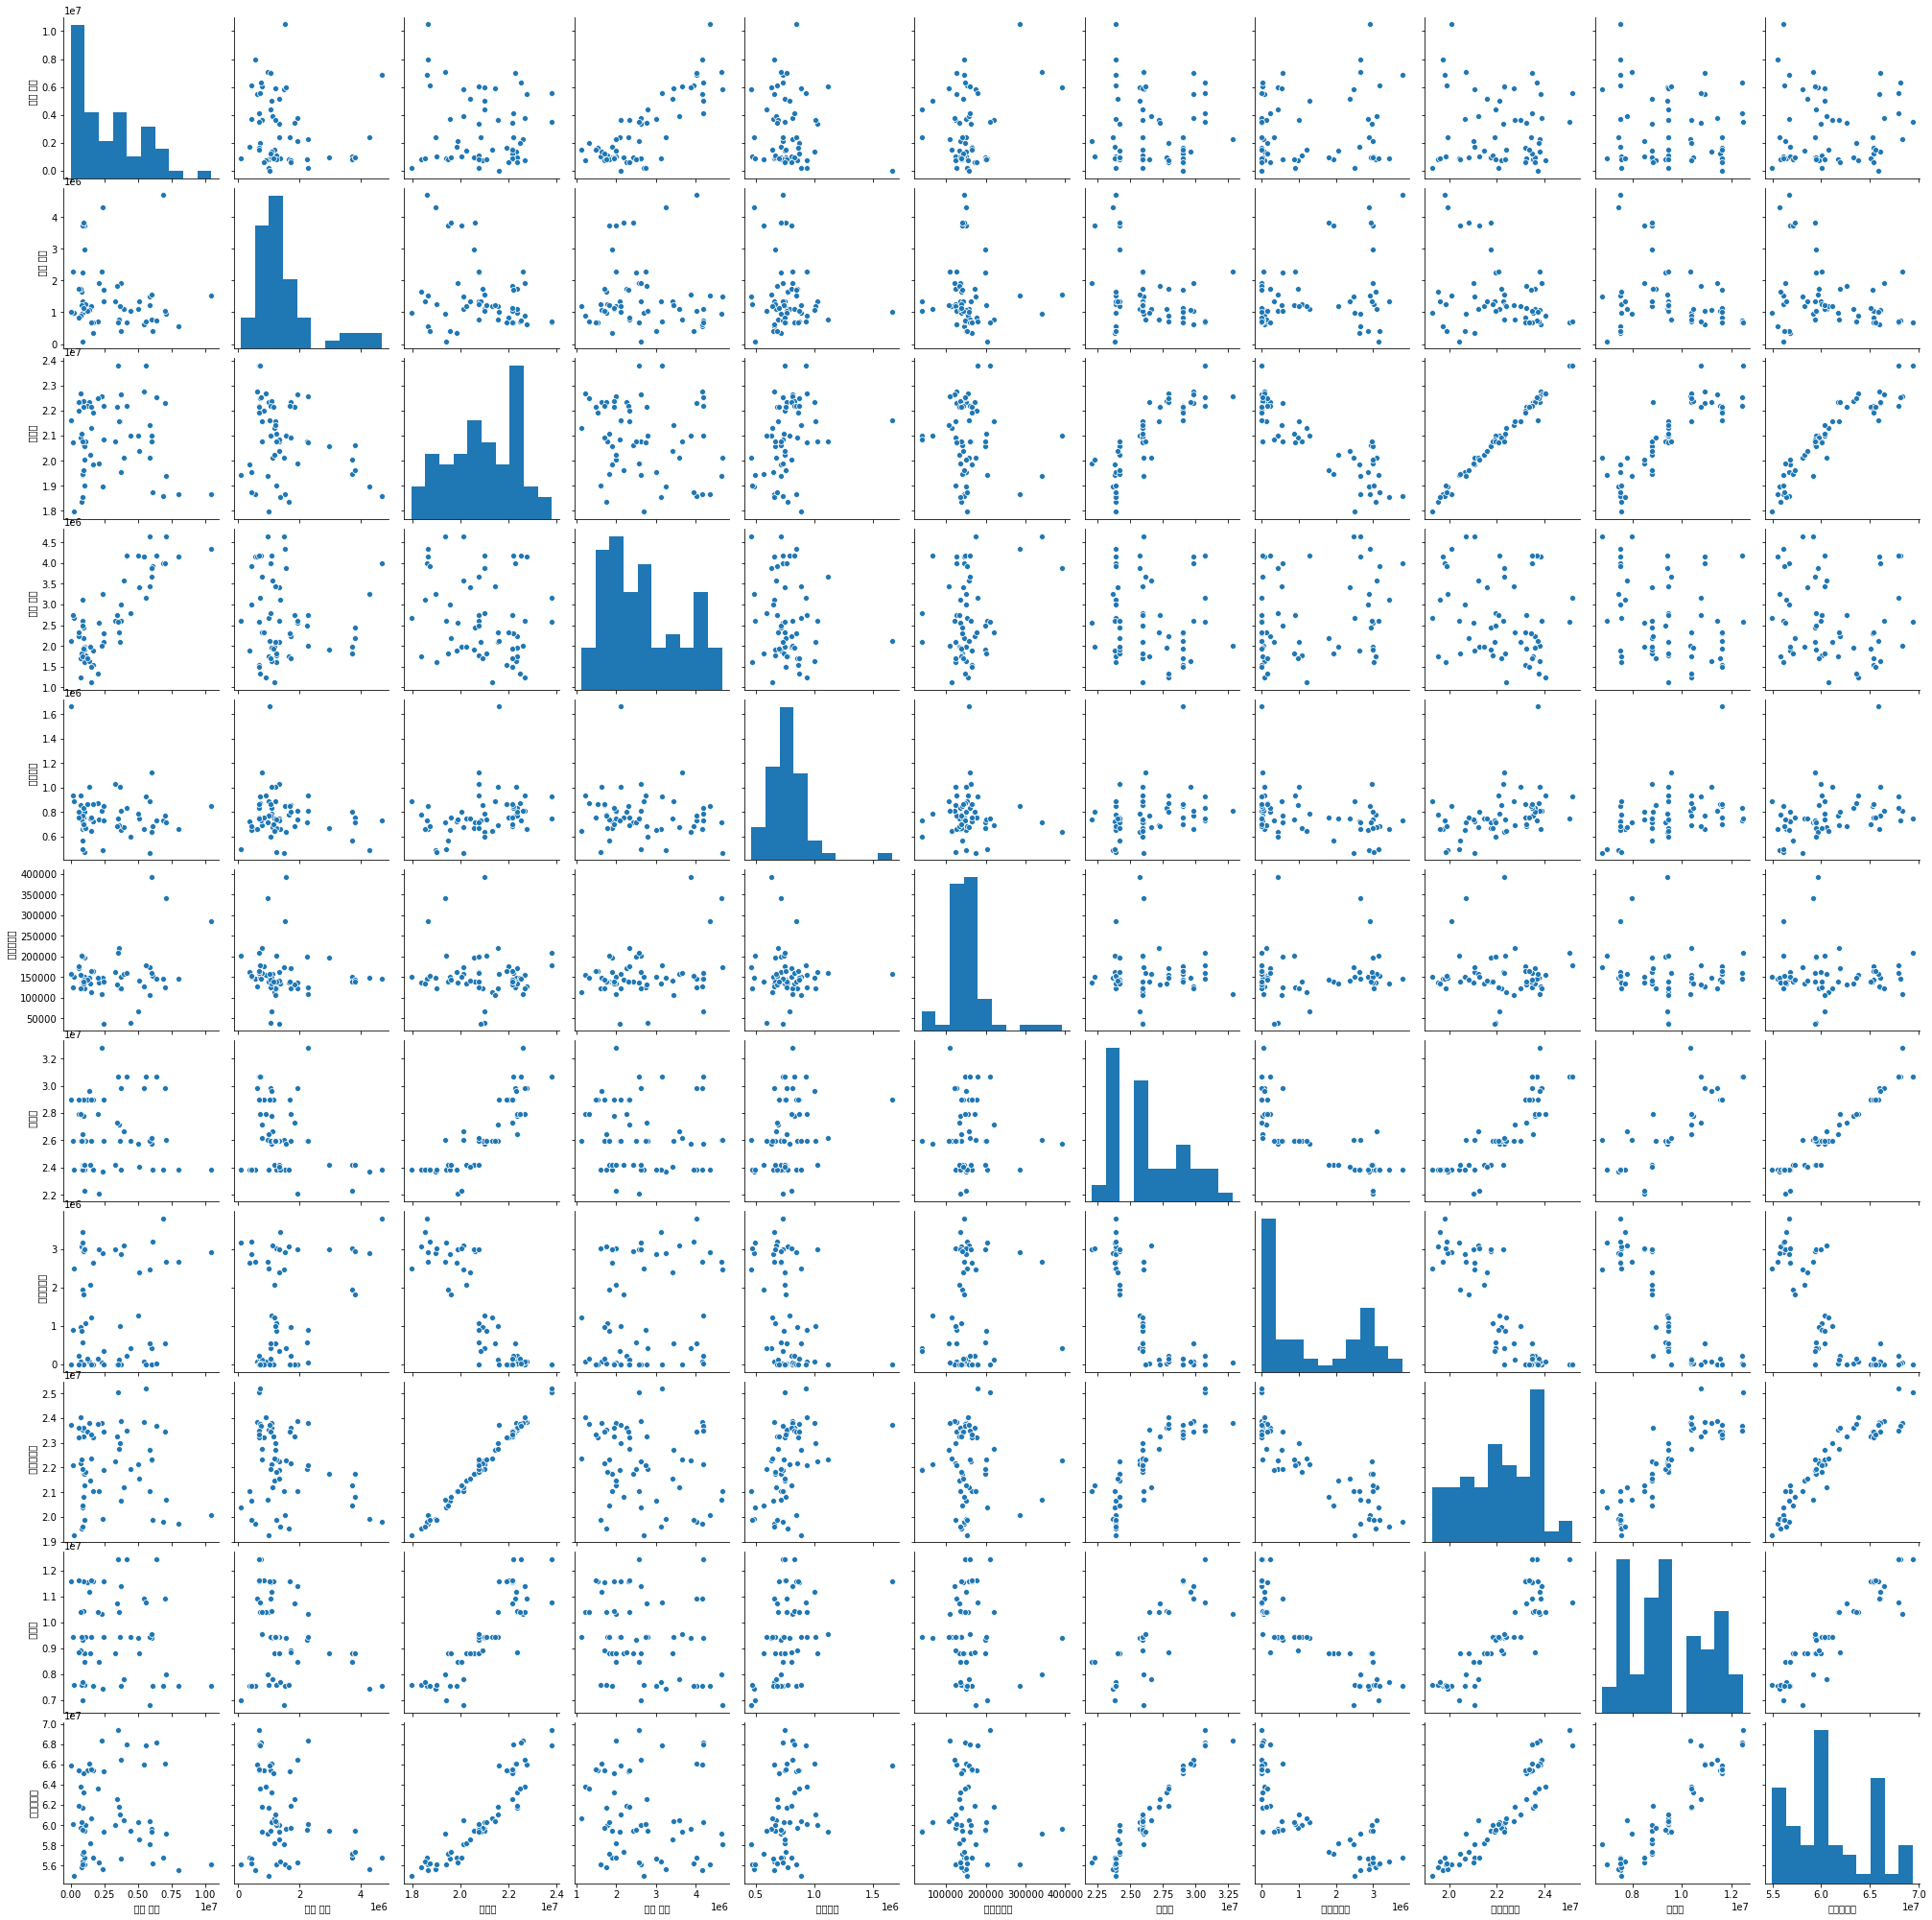

In [17]:
sns.pairplot(df)
plt.show()

In [14]:
df.shape

(60, 12)

In [15]:
from collections import Counter 

In [31]:
# def detect_outliers(df, n, features):
#     outlier_indices = [] 
#     for col in features: 
#         Q1 = np.percentile(df[col], 25) 
#         Q3 = np.percentile(df[col], 75) 
#         IQR = Q3 - Q1 
#         outlier_step = 1.5 * IQR 
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
#         outlier_indices.extend(outlier_list_col) 
#     outlier_indices = Counter(outlier_indices) 
#     multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
#     return multiple_outliers 

# Outliers_to_drop = detect_outliers(df, 2, ["    제세공과금"])
# Outliers_to_drop

[]

In [36]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df, column='    제세공과금', weight=1.5)
outlier_idx

Int64Index([0, 12, 24, 25, 26, 27, 46, 58], dtype='int64')

In [37]:
df.drop(outlier_idx, axis=0, inplace=True)

In [38]:
df.shape

(52, 22)

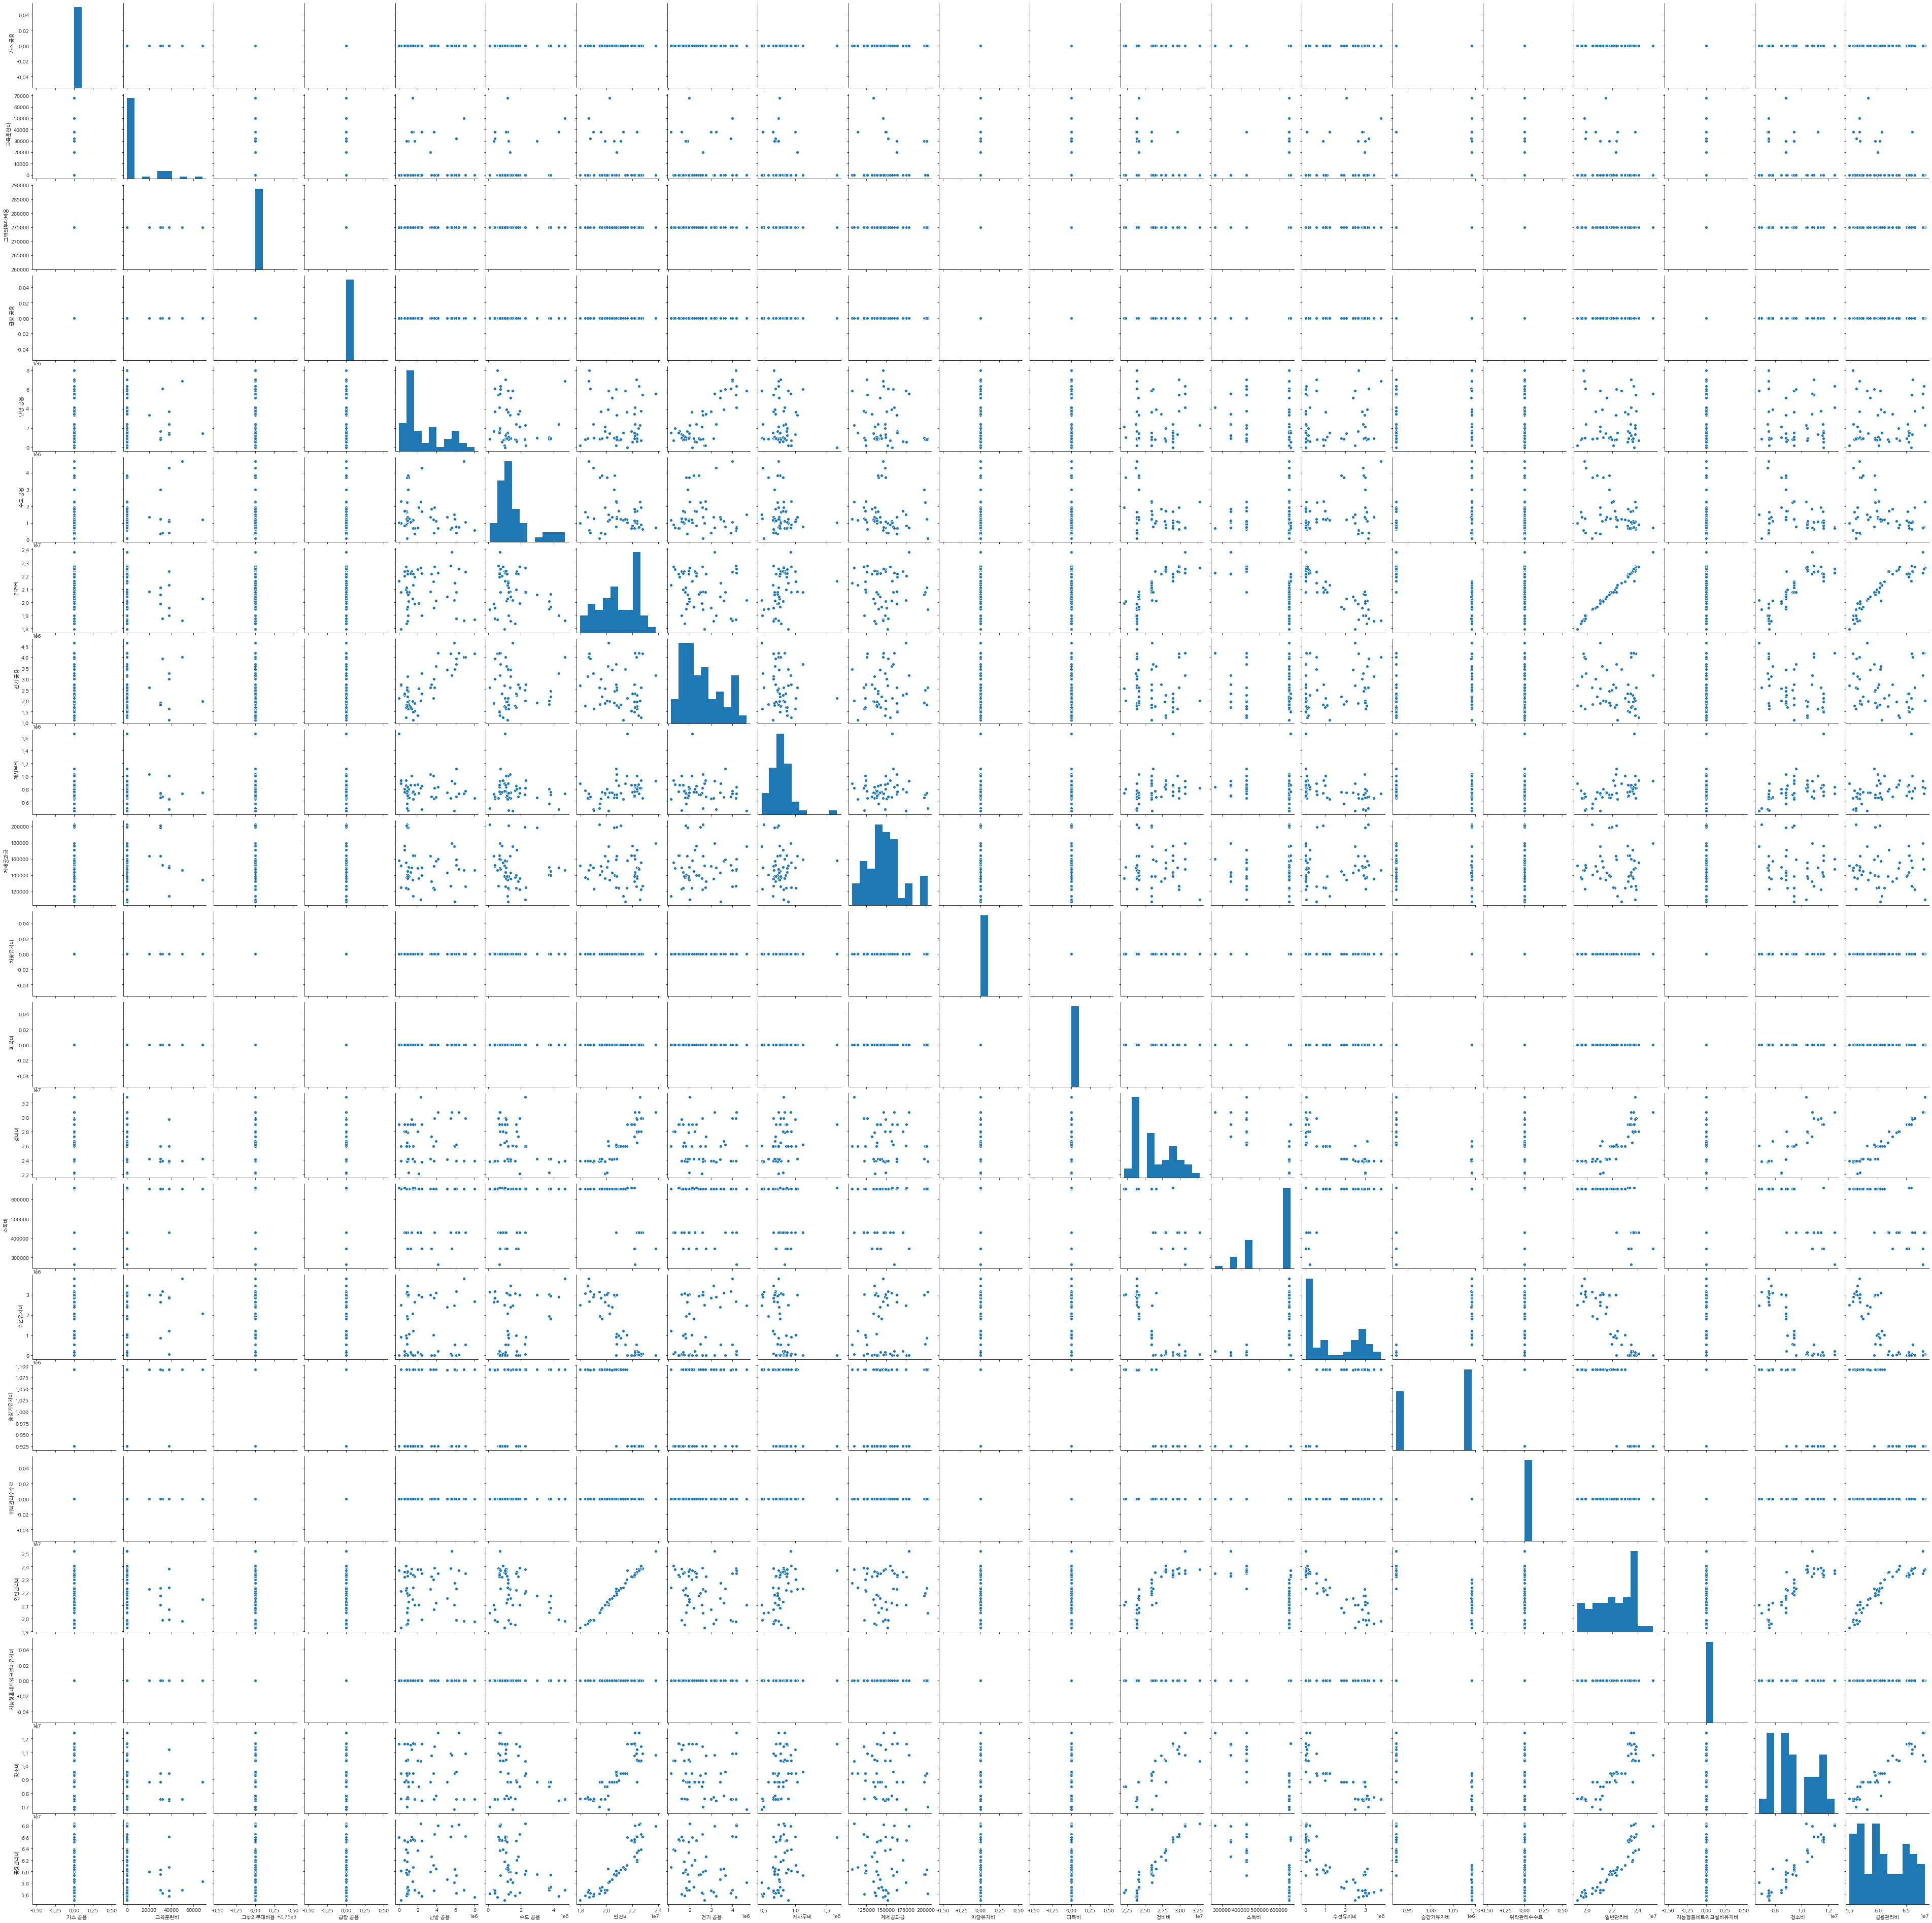

In [39]:
sns.pairplot(df)

In [44]:
df.columns

Index(['Date', '    가스 공용', '    교육훈련비', '    그밖의부대비용', '    급탕 공용',
       '    난방 공용', '    수도 공용', '    인건비', '    전기 공용', '    제사무비',
       '    제세공과금', '    차량유지비', '    피복비', '  경비비', '  소독비', '  수선유지비',
       '  승강기유지비', '  위탁관리수수료', '  일반관리비', '  지능형홈네트워크설비유지비', '  청소비',
       '공용관리비'],
      dtype='object')

In [46]:
df.columns = ['Date','가스공용','교육훈련비','그밖의부대비용','급탕공용','난방공용','수도공용','인건비',
              '전기공용','제사무비','제세공과금','차량유지비','피복비','경비비','소독비','수선유지비','승강기유지비','위탁관리수수료','일반관리비',
             '지능형홈네트워크설비유지비','청소비','공용관리비']

In [51]:
df

,Date,교육훈련비,그밖의부대비용,급탕공용,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,...,피복비,경비비,소독비,수선유지비,승강기유지비,위탁관리수수료,일반관리비,지능형홈네트워크설비유지비,청소비,공용관리비
1,2015-02-01,0.0,275000.0,0.0,7989222.0,557425.0,18658930.0,4157157.0,658700.0,146120.0,...,0.0,23870820.0,655000.0,2658180.0,1091660.0,0.0,19738750.0,0.0,7528740.0,55543150.0
2,2015-03-01,50000.0,275000.0,0.0,6851372.0,4693430.0,18594380.0,4002670.0,731260.0,146030.0,...,0.0,23870820.0,655000.0,3800710.0,1091660.0,0.0,19796670.0,0.0,7528740.0,56743600.0
3,2015-04-01,38000.0,275000.0,0.0,2409442.0,4304100.0,18964120.0,3245115.0,485220.0,148980.0,...,0.0,23696300.0,655000.0,2902730.0,1091660.0,0.0,19911320.0,0.0,7425080.0,55682090.0
4,2015-05-01,0.0,275000.0,0.0,998032.0,1245270.0,18995190.0,1612106.0,472500.0,122840.0,...,0.0,23870820.0,655000.0,3027500.0,1091660.0,0.0,19865530.0,0.0,7571550.0,56082060.0
5,2015-06-01,0.0,275000.0,0.0,811092.0,1644480.0,18355030.0,1753782.0,775450.0,137050.0,...,0.0,23870820.0,655000.0,3073330.0,1091660.0,0.0,19542530.0,0.0,7571550.0,55804890.0
6,2015-07-01,0.0,275000.0,0.0,201380.0,991250.0,17954210.0,2685901.0,890280.0,151860.0,...,0.0,23870820.0,655000.0,2500000.0,1091660.0,0.0,19271350.0,0.0,7571550.0,54960380.0
7,2015-08-01,0.0,275000.0,0.0,902580.0,1358600.0,18538250.0,3118116.0,656270.0,135360.0,...,0.0,23870820.0,655000.0,3438490.0,1091660.0,0.0,19604880.0,0.0,7710180.0,56371030.0
8,2015-09-01,0.0,275000.0,0.0,886260.0,89525.0,19431230.0,2609218.0,496800.0,202570.0,...,0.0,23825560.0,655000.0,3153320.0,1091660.0,0.0,20405600.0,0.0,6988590.0,56119730.0
9,2015-10-01,30000.0,275000.0,0.0,1688060.0,358925.0,19859570.0,1889223.0,719150.0,163500.0,...,0.0,23827020.0,655000.0,2637850.0,1091660.0,0.0,21047220.0,0.0,7528740.0,56787490.0
10,2015-11-01,38000.0,275000.0,0.0,3711760.0,414900.0,19561060.0,2995604.0,650150.0,150710.0,...,0.0,23870820.0,655000.0,2855140.0,1091660.0,0.0,20674920.0,0.0,7528740.0,56676280.0


In [50]:
df.drop("가스공용",axis = 1,inplace=True)

In [52]:
df.drop("그밖의부대비용",axis = 1,inplace=True)

In [53]:
df.drop("급탕공용",axis = 1,inplace=True)

In [54]:
df.drop("차량유지비",axis = 1,inplace=True)

In [55]:
df.drop("피복비",axis = 1,inplace=True)

In [56]:
df.drop("지능형홈네트워크설비유지비",axis = 1,inplace=True)

In [58]:
df.drop("위탁관리수수료",axis = 1,inplace=True)

In [59]:
df

,Date,교육훈련비,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,경비비,소독비,수선유지비,승강기유지비,일반관리비,청소비,공용관리비
1,2015-02-01,0.0,7989222.0,557425.0,18658930.0,4157157.0,658700.0,146120.0,23870820.0,655000.0,2658180.0,1091660.0,19738750.0,7528740.0,55543150.0
2,2015-03-01,50000.0,6851372.0,4693430.0,18594380.0,4002670.0,731260.0,146030.0,23870820.0,655000.0,3800710.0,1091660.0,19796670.0,7528740.0,56743600.0
3,2015-04-01,38000.0,2409442.0,4304100.0,18964120.0,3245115.0,485220.0,148980.0,23696300.0,655000.0,2902730.0,1091660.0,19911320.0,7425080.0,55682090.0
4,2015-05-01,0.0,998032.0,1245270.0,18995190.0,1612106.0,472500.0,122840.0,23870820.0,655000.0,3027500.0,1091660.0,19865530.0,7571550.0,56082060.0
5,2015-06-01,0.0,811092.0,1644480.0,18355030.0,1753782.0,775450.0,137050.0,23870820.0,655000.0,3073330.0,1091660.0,19542530.0,7571550.0,55804890.0
6,2015-07-01,0.0,201380.0,991250.0,17954210.0,2685901.0,890280.0,151860.0,23870820.0,655000.0,2500000.0,1091660.0,19271350.0,7571550.0,54960380.0
7,2015-08-01,0.0,902580.0,1358600.0,18538250.0,3118116.0,656270.0,135360.0,23870820.0,655000.0,3438490.0,1091660.0,19604880.0,7710180.0,56371030.0
8,2015-09-01,0.0,886260.0,89525.0,19431230.0,2609218.0,496800.0,202570.0,23825560.0,655000.0,3153320.0,1091660.0,20405600.0,6988590.0,56119730.0
9,2015-10-01,30000.0,1688060.0,358925.0,19859570.0,1889223.0,719150.0,163500.0,23827020.0,655000.0,2637850.0,1091660.0,21047220.0,7528740.0,56787490.0
10,2015-11-01,38000.0,3711760.0,414900.0,19561060.0,2995604.0,650150.0,150710.0,23870820.0,655000.0,2855140.0,1091660.0,20674920.0,7528740.0,56676280.0


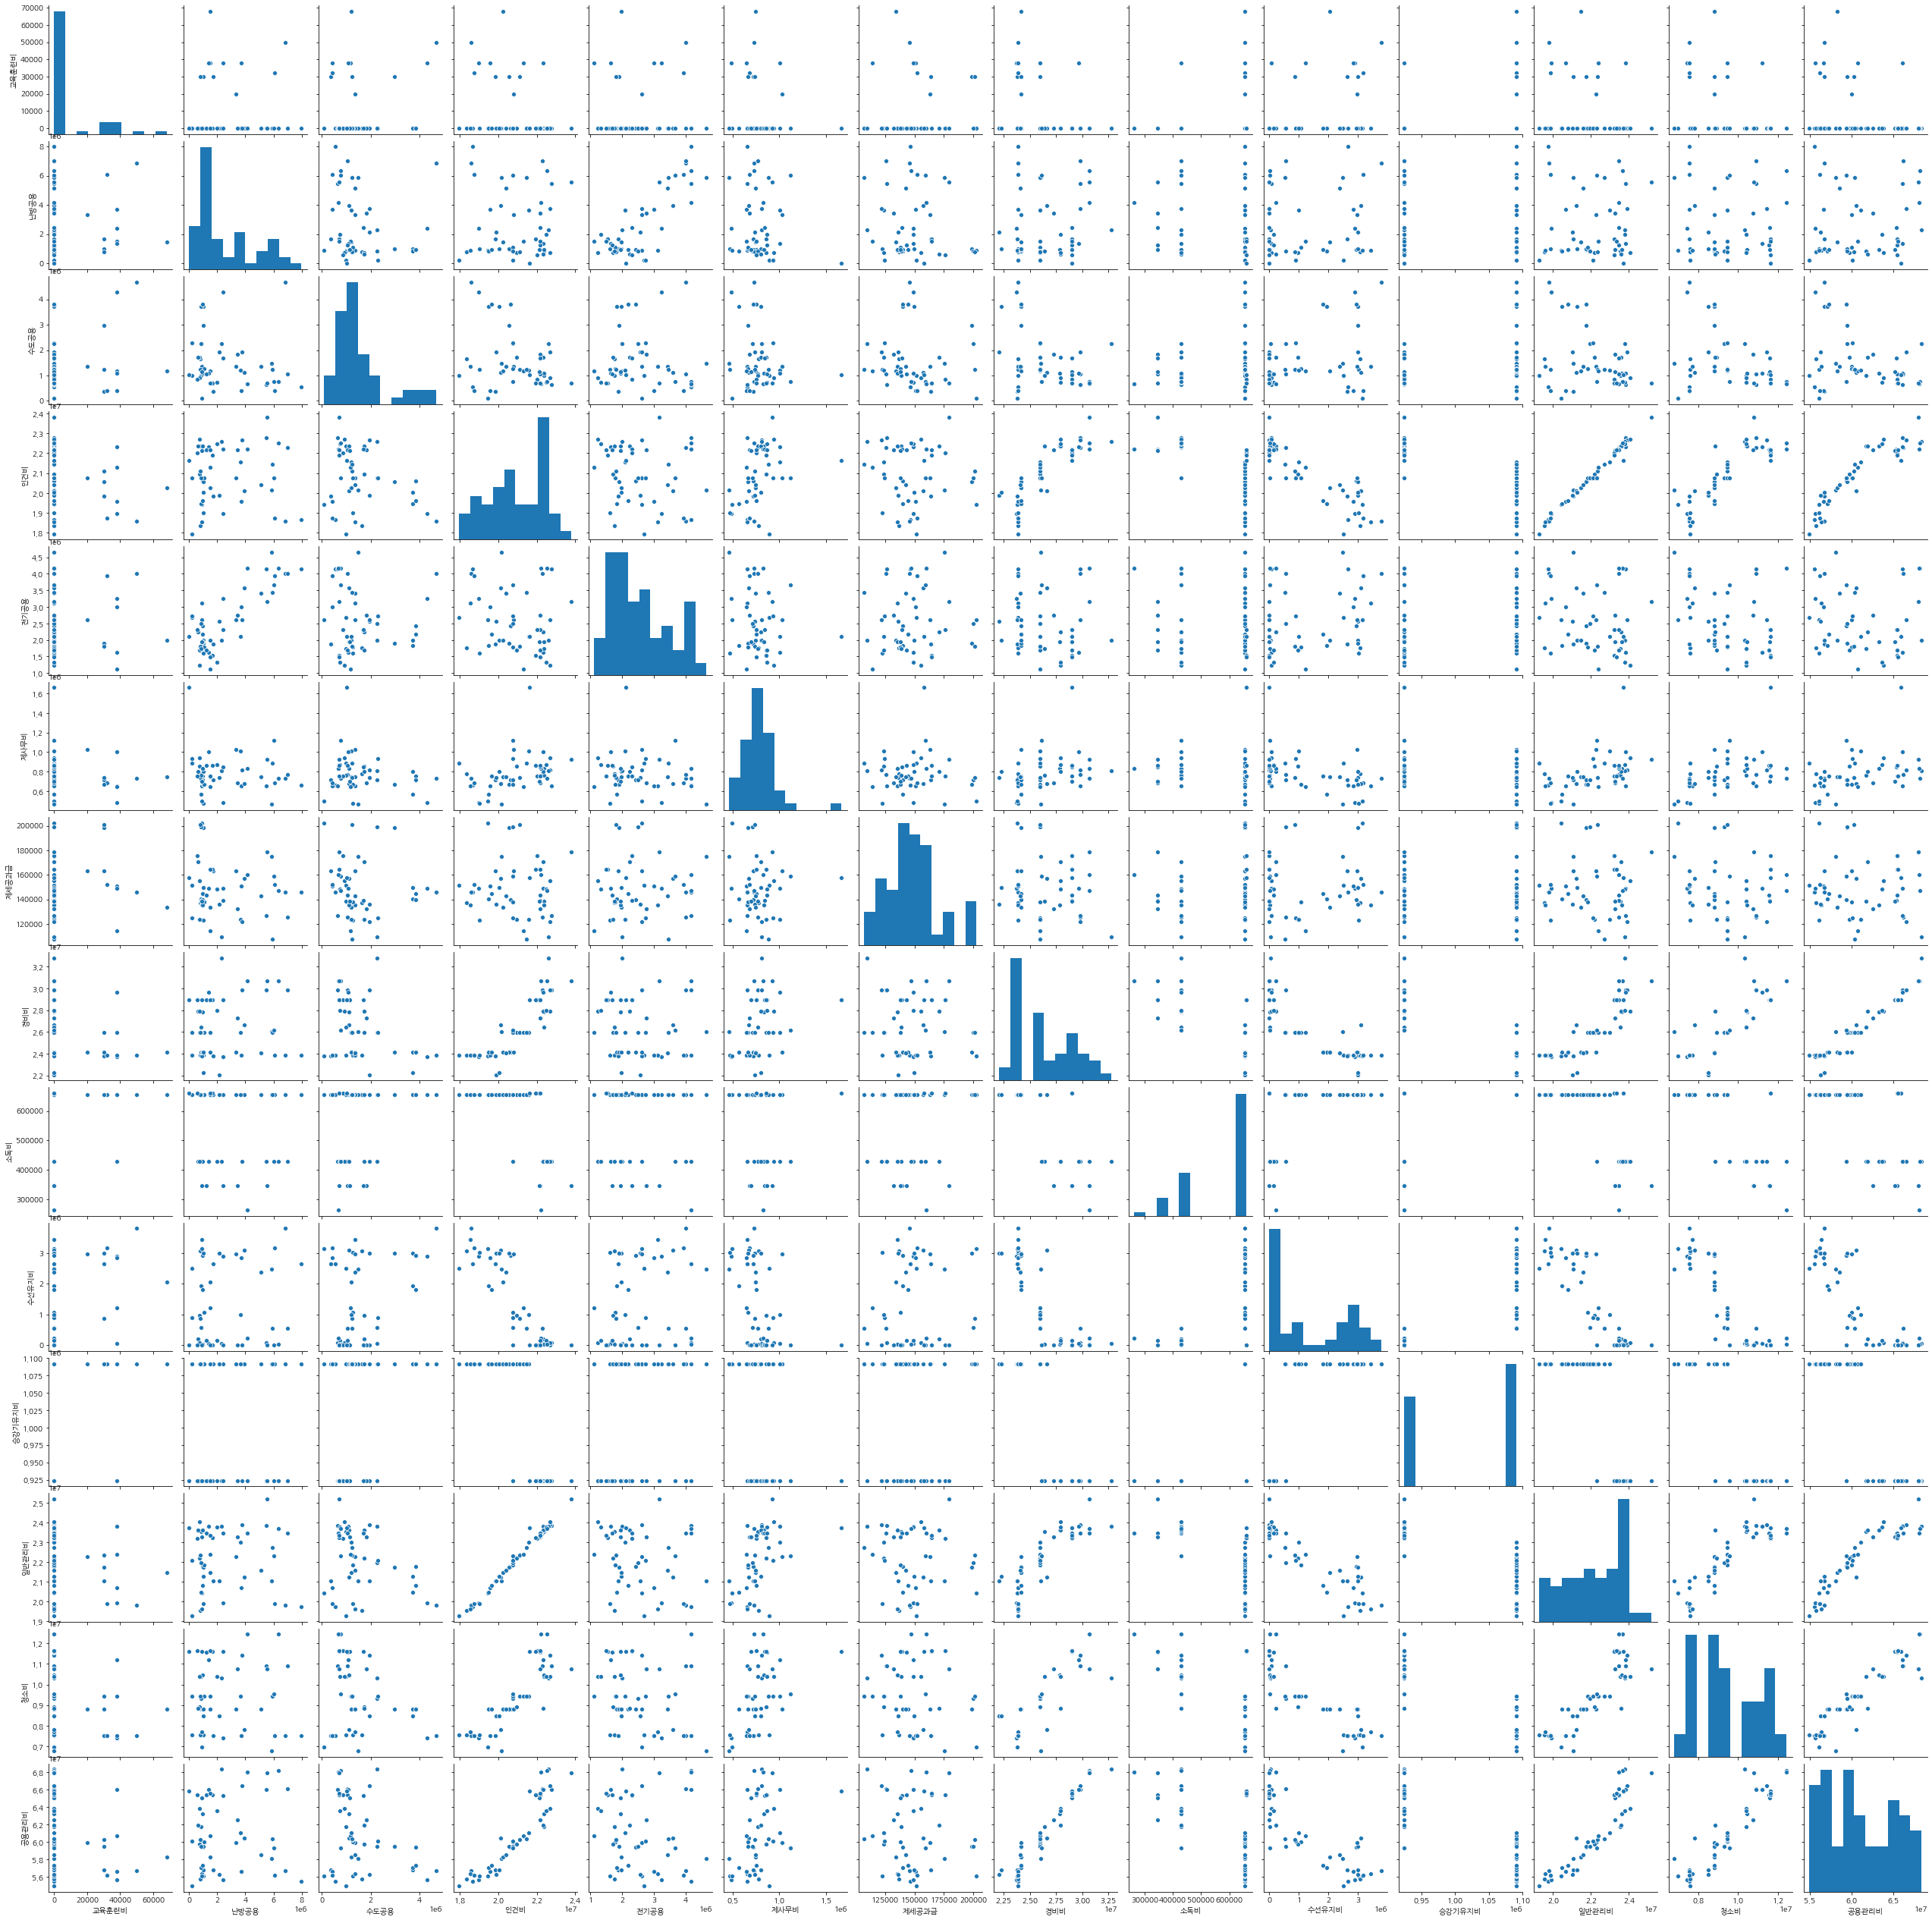

In [60]:
sns.pairplot(df)

In [78]:
import datetime as dt

In [74]:
df['Date'] = pd.to_datetime(df['Date'])

In [76]:
df.Date

1    2015-02-01
2    2015-03-01
3    2015-04-01
4    2015-05-01
5    2015-06-01
6    2015-07-01
7    2015-08-01
8    2015-09-01
9    2015-10-01
10   2015-11-01
11   2015-12-01
13   2016-02-01
14   2016-03-01
15   2016-04-01
16   2016-05-01
17   2016-06-01
18   2016-07-01
19   2016-08-01
20   2016-09-01
21   2016-10-01
22   2016-11-01
23   2016-12-01
28   2017-05-01
29   2017-06-01
30   2017-07-01
31   2017-08-01
32   2017-09-01
33   2017-10-01
34   2017-11-01
35   2017-12-01
36   2018-01-01
37   2018-02-01
38   2018-03-01
39   2018-04-01
40   2018-05-01
41   2018-06-01
42   2018-07-01
43   2018-08-01
44   2018-09-01
45   2018-10-01
47   2018-12-01
48   2019-01-01
49   2019-02-01
50   2019-03-01
51   2019-04-01
52   2019-05-01
53   2019-06-01
54   2019-07-01
55   2019-08-01
56   2019-09-01
57   2019-10-01
59   2019-12-01
Name: Date, dtype: datetime64[ns]

In [82]:
df['month'] = df['Date'].dt.month

In [84]:
month = df.month.tolist()

In [88]:
month

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12]

In [89]:
season=[]
for i in month:
    if i > 11 or i <3:
        season.append(4)
    elif i > 2 and i <6:
        season.append(1)
    elif i > 5 and i < 9:
        season.append(2)
    else:
        season.append(3)

        

In [90]:
season

[4,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 4,
 4,
 4,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 4]

In [92]:
df['season'] = season

In [93]:
df

,Date,교육훈련비,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,경비비,소독비,수선유지비,승강기유지비,일반관리비,청소비,공용관리비,month,season
1,2015-02-01,0.0,7989222.0,557425.0,18658930.0,4157157.0,658700.0,146120.0,23870820.0,655000.0,2658180.0,1091660.0,19738750.0,7528740.0,55543150.0,2,4
2,2015-03-01,50000.0,6851372.0,4693430.0,18594380.0,4002670.0,731260.0,146030.0,23870820.0,655000.0,3800710.0,1091660.0,19796670.0,7528740.0,56743600.0,3,1
3,2015-04-01,38000.0,2409442.0,4304100.0,18964120.0,3245115.0,485220.0,148980.0,23696300.0,655000.0,2902730.0,1091660.0,19911320.0,7425080.0,55682090.0,4,1
4,2015-05-01,0.0,998032.0,1245270.0,18995190.0,1612106.0,472500.0,122840.0,23870820.0,655000.0,3027500.0,1091660.0,19865530.0,7571550.0,56082060.0,5,1
5,2015-06-01,0.0,811092.0,1644480.0,18355030.0,1753782.0,775450.0,137050.0,23870820.0,655000.0,3073330.0,1091660.0,19542530.0,7571550.0,55804890.0,6,2
6,2015-07-01,0.0,201380.0,991250.0,17954210.0,2685901.0,890280.0,151860.0,23870820.0,655000.0,2500000.0,1091660.0,19271350.0,7571550.0,54960380.0,7,2
7,2015-08-01,0.0,902580.0,1358600.0,18538250.0,3118116.0,656270.0,135360.0,23870820.0,655000.0,3438490.0,1091660.0,19604880.0,7710180.0,56371030.0,8,2
8,2015-09-01,0.0,886260.0,89525.0,19431230.0,2609218.0,496800.0,202570.0,23825560.0,655000.0,3153320.0,1091660.0,20405600.0,6988590.0,56119730.0,9,3
9,2015-10-01,30000.0,1688060.0,358925.0,19859570.0,1889223.0,719150.0,163500.0,23827020.0,655000.0,2637850.0,1091660.0,21047220.0,7528740.0,56787490.0,10,3
10,2015-11-01,38000.0,3711760.0,414900.0,19561060.0,2995604.0,650150.0,150710.0,23870820.0,655000.0,2855140.0,1091660.0,20674920.0,7528740.0,56676280.0,11,3


In [94]:
df.corr()

,교육훈련비,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,경비비,소독비,수선유지비,승강기유지비,일반관리비,청소비,공용관리비,month,season
교육훈련비,1.000000,0.053336,0.146174,-0.278970,-0.035518,-0.141558,0.091355,-0.306786,0.262104,0.354031,0.326080,-0.270963,-0.293924,-0.279589,0.217937,0.019360
난방공용,0.053336,1.000000,-0.153127,0.021585,0.818890,-0.098277,-0.128103,0.117820,-0.171831,0.058924,-0.049871,0.007173,-0.032807,0.077907,-0.189734,0.541717
수도공용,0.146174,-0.153127,1.000000,-0.296577,-0.037972,-0.175559,-0.111497,-0.339788,0.239607,0.337241,0.340367,-0.304176,-0.255835,-0.304125,-0.234665,-0.494737
인건비,-0.278970,0.021585,-0.296577,1.000000,-0.181779,0.362445,-0.058322,0.857005,-0.715255,-0.882492,-0.817279,0.993331,0.860047,0.921145,-0.043910,0.113089
전기공용,-0.035518,0.818890,-0.037972,-0.181779,1.000000,-0.169803,0.031105,0.001540,-0.068771,0.213367,0.078622,-0.193976,-0.171380,-0.068327,-0.326153,0.442464
제사무비,-0.141558,-0.098277,-0.175559,0.362445,-0.169803,1.000000,-0.041733,0.331465,-0.180489,-0.439689,-0.385532,0.466071,0.444911,0.399634,0.279594,0.030249
제세공과금,0.091355,-0.128103,-0.111497,-0.058322,0.031105,-0.041733,1.000000,-0.081460,0.133594,0.102673,0.035418,-0.044961,-0.108294,-0.072131,0.214434,0.215896
경비비,-0.306786,0.117820,-0.339788,0.857005,0.001540,0.331465,-0.081460,1.000000,-0.725950,-0.848749,-0.863351,0.852653,0.847972,0.965116,-0.262821,0.080393
소독비,0.262104,-0.171831,0.239607,-0.715255,-0.068771,-0.180489,0.133594,-0.725950,1.000000,0.677699,0.820830,-0.698770,-0.670977,-0.712789,0.304284,-0.012421
수선유지비,0.354031,0.058924,0.337241,-0.882492,0.213367,-0.439689,0.102673,-0.848749,0.677699,1.000000,0.836032,-0.889413,-0.878162,-0.846732,0.054505,-0.078863


In [97]:
df_corr = df.drop('Date',axis = 1)

In [105]:
df_corr = df_corr.corr()

In [108]:
mask = np.zeros_like(df_corr,dtype = np.bool)
mask[np.tril_indices_from(mask)] = True

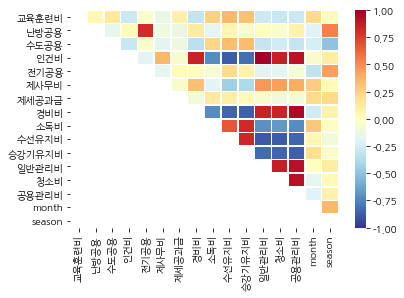

In [109]:
sns.heatmap(df_corr,
           cmap = 'RdYlBu_r',
           mask = mask,
           linewidths = 0.5,
           vmin = -1, vmax = 1)

In [111]:
df.set_index(df['Date'],inplace=True)

In [114]:
df_new = df.drop("Date",axis = 1)

In [115]:
df_new

,교육훈련비,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,경비비,소독비,수선유지비,승강기유지비,일반관리비,청소비,공용관리비,month,season
Date,,,,,,,,,,,,,,,,
2015-02-01,0.0,7989222.0,557425.0,18658930.0,4157157.0,658700.0,146120.0,23870820.0,655000.0,2658180.0,1091660.0,19738750.0,7528740.0,55543150.0,2,4
2015-03-01,50000.0,6851372.0,4693430.0,18594380.0,4002670.0,731260.0,146030.0,23870820.0,655000.0,3800710.0,1091660.0,19796670.0,7528740.0,56743600.0,3,1
2015-04-01,38000.0,2409442.0,4304100.0,18964120.0,3245115.0,485220.0,148980.0,23696300.0,655000.0,2902730.0,1091660.0,19911320.0,7425080.0,55682090.0,4,1
2015-05-01,0.0,998032.0,1245270.0,18995190.0,1612106.0,472500.0,122840.0,23870820.0,655000.0,3027500.0,1091660.0,19865530.0,7571550.0,56082060.0,5,1
2015-06-01,0.0,811092.0,1644480.0,18355030.0,1753782.0,775450.0,137050.0,23870820.0,655000.0,3073330.0,1091660.0,19542530.0,7571550.0,55804890.0,6,2
2015-07-01,0.0,201380.0,991250.0,17954210.0,2685901.0,890280.0,151860.0,23870820.0,655000.0,2500000.0,1091660.0,19271350.0,7571550.0,54960380.0,7,2
2015-08-01,0.0,902580.0,1358600.0,18538250.0,3118116.0,656270.0,135360.0,23870820.0,655000.0,3438490.0,1091660.0,19604880.0,7710180.0,56371030.0,8,2
2015-09-01,0.0,886260.0,89525.0,19431230.0,2609218.0,496800.0,202570.0,23825560.0,655000.0,3153320.0,1091660.0,20405600.0,6988590.0,56119730.0,9,3
2015-10-01,30000.0,1688060.0,358925.0,19859570.0,1889223.0,719150.0,163500.0,23827020.0,655000.0,2637850.0,1091660.0,21047220.0,7528740.0,56787490.0,10,3


In [125]:
df_new.set_index(df_new["month"],inplace=True)

In [126]:
df_new

,교육훈련비,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,경비비,소독비,수선유지비,승강기유지비,일반관리비,청소비,공용관리비,month,season
month,,,,,,,,,,,,,,,,
2,0.0,7989222.0,557425.0,18658930.0,4157157.0,658700.0,146120.0,23870820.0,655000.0,2658180.0,1091660.0,19738750.0,7528740.0,55543150.0,2,4
3,50000.0,6851372.0,4693430.0,18594380.0,4002670.0,731260.0,146030.0,23870820.0,655000.0,3800710.0,1091660.0,19796670.0,7528740.0,56743600.0,3,1
4,38000.0,2409442.0,4304100.0,18964120.0,3245115.0,485220.0,148980.0,23696300.0,655000.0,2902730.0,1091660.0,19911320.0,7425080.0,55682090.0,4,1
5,0.0,998032.0,1245270.0,18995190.0,1612106.0,472500.0,122840.0,23870820.0,655000.0,3027500.0,1091660.0,19865530.0,7571550.0,56082060.0,5,1
6,0.0,811092.0,1644480.0,18355030.0,1753782.0,775450.0,137050.0,23870820.0,655000.0,3073330.0,1091660.0,19542530.0,7571550.0,55804890.0,6,2
7,0.0,201380.0,991250.0,17954210.0,2685901.0,890280.0,151860.0,23870820.0,655000.0,2500000.0,1091660.0,19271350.0,7571550.0,54960380.0,7,2
8,0.0,902580.0,1358600.0,18538250.0,3118116.0,656270.0,135360.0,23870820.0,655000.0,3438490.0,1091660.0,19604880.0,7710180.0,56371030.0,8,2
9,0.0,886260.0,89525.0,19431230.0,2609218.0,496800.0,202570.0,23825560.0,655000.0,3153320.0,1091660.0,20405600.0,6988590.0,56119730.0,9,3
10,30000.0,1688060.0,358925.0,19859570.0,1889223.0,719150.0,163500.0,23827020.0,655000.0,2637850.0,1091660.0,21047220.0,7528740.0,56787490.0,10,3


In [119]:
monthly_df.sum()

,교육훈련비,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,경비비,소독비,수선유지비,승강기유지비,일반관리비,청소비,공용관리비,month,season
Date,,,,,,,,,,,,,,,,
2015-02-28,0.0,7989222.0,557425.0,18658930.0,4157157.0,658700.0,146120.0,23870820.0,655000.0,2658180.0,1091660.0,19738750.0,7528740.0,55543150.0,2,4
2015-03-31,50000.0,6851372.0,4693430.0,18594380.0,4002670.0,731260.0,146030.0,23870820.0,655000.0,3800710.0,1091660.0,19796670.0,7528740.0,56743600.0,3,1
2015-04-30,38000.0,2409442.0,4304100.0,18964120.0,3245115.0,485220.0,148980.0,23696300.0,655000.0,2902730.0,1091660.0,19911320.0,7425080.0,55682090.0,4,1
2015-05-31,0.0,998032.0,1245270.0,18995190.0,1612106.0,472500.0,122840.0,23870820.0,655000.0,3027500.0,1091660.0,19865530.0,7571550.0,56082060.0,5,1
2015-06-30,0.0,811092.0,1644480.0,18355030.0,1753782.0,775450.0,137050.0,23870820.0,655000.0,3073330.0,1091660.0,19542530.0,7571550.0,55804890.0,6,2
2015-07-31,0.0,201380.0,991250.0,17954210.0,2685901.0,890280.0,151860.0,23870820.0,655000.0,2500000.0,1091660.0,19271350.0,7571550.0,54960380.0,7,2
2015-08-31,0.0,902580.0,1358600.0,18538250.0,3118116.0,656270.0,135360.0,23870820.0,655000.0,3438490.0,1091660.0,19604880.0,7710180.0,56371030.0,8,2
2015-09-30,0.0,886260.0,89525.0,19431230.0,2609218.0,496800.0,202570.0,23825560.0,655000.0,3153320.0,1091660.0,20405600.0,6988590.0,56119730.0,9,3
2015-10-31,30000.0,1688060.0,358925.0,19859570.0,1889223.0,719150.0,163500.0,23827020.0,655000.0,2637850.0,1091660.0,21047220.0,7528740.0,56787490.0,10,3


In [139]:
df_monthly = df_new.groupby(df_new['month']).sum()

In [142]:
month = df_monthly.index

In [145]:
df_new = df

In [149]:
df_new.drop("Date",axis = 1,inplace=True)

In [151]:
df_new.describe()

,교육훈련비,난방공용,수도공용,인건비,전기공용,제사무비,제세공과금,경비비,소독비,수선유지비,승강기유지비,일반관리비,청소비,공용관리비,month,season
count,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,5.200000e+01,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000
mean,7923.076923,2.554139e+06,1.523451e+06,2.093861e+07,2.549600e+06,7.799844e+05,148383.076923,2.643115e+07,566021.730769,1.359999e+06,1.020692e+06,2.214990e+07,9.477266e+06,6.100503e+07,6.846154,2.423077
std,16425.525513,2.185830e+06,1.066887e+06,1.441340e+06,9.196106e+05,1.859964e+05,22298.852563,2.596651e+06,127819.058012,1.328822e+06,8.361037e+04,1.512961e+06,1.575883e+06,4.072231e+06,3.250247,1.090892
min,0.000000,4.400000e+03,8.952500e+04,1.795421e+07,1.122651e+06,4.646000e+05,107360.000000,2.206724e+07,263170.000000,0.000000e+00,9.240000e+05,1.927135e+07,6.784920e+06,5.496038e+07,1.000000,1.000000
25%,0.000000,8.985000e+05,8.239725e+05,1.988037e+07,1.826033e+06,6.796325e+05,135562.500000,2.402817e+07,428830.000000,4.487500e+04,9.240000e+05,2.104378e+07,8.312135e+06,5.703390e+07,4.000000,1.750000
50%,0.000000,1.502950e+06,1.195285e+06,2.085536e+07,2.315330e+06,7.530400e+05,146075.000000,2.593072e+07,655000.000000,9.411550e+05,1.091660e+06,2.228764e+07,9.431281e+06,6.020773e+07,7.000000,2.000000
75%,0.000000,3.812230e+06,1.751826e+06,2.219378e+07,3.176306e+06,8.571450e+05,159347.500000,2.899233e+07,655000.000000,2.867038e+06,1.091660e+06,2.347022e+07,1.080344e+07,6.532725e+07,9.250000,3.000000
max,68000.000000,7.989222e+06,4.693430e+06,2.381313e+07,4.651701e+06,1.662300e+06,202570.000000,3.281061e+07,661000.000000,3.800710e+06,1.091660e+06,2.519198e+07,1.243467e+07,6.833868e+07,12.000000,4.000000


In [158]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
train_set

MinMaxScaler(feature_range=              교육훈련비       난방공용       수도공용         인건비       전기공용       제사무비  \
Date                                                                          
2015-02-01      0.0  7989222.0   557425.0  18658930.0  4157157.0   658700.0   
2015-03-01  50000.0  6851372.0  4693430.0  18594380.0  4002670.0   731260.0   
2015-04-01  38000.0  2409442.0  4304100.0  18964120.0  3245115.0   485220.0   
2015-05-01      0.0   998032.0  1245270.0  18995190.0  1612106.0   472500.0   
2015-06-01      0.0   811092.0  1644480.0  18355030.0  1753782.0   775450....
2017-08-01   9431281.0  60096063.0      8       2  
2017-09-01   9431281.0  60319393.0      9       3  
2017-10-01   9431281.0  60710843.0     10       3  
2017-11-01   9431281.0  61098013.0     11       3  
2017-12-01   9431281.0  60362233.0     12       4  
2018-01-01  10909393.0  66118923.0      1       4  
2018-02-01  10909393.0  66018733.0      2       4  
2018-03-01  11418511.0  66495201.0      3       1  
2018-

In [161]:
seq_length=12
# train/test split
train_size = int(40) # 52*0.7
train_set = df_new[0:train_size]
test_set = df_new[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)



# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length): #0~52
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)


TypeError: object of type 'MinMaxScaler' has no len()